# **Esame del 20 Luglio 2023**

- Non si possono consultare libri, note, ed ogni altro materiale o persone durante
l’esame ad eccezione delle funzioni Python fornite.

- Risolvere i seguenti esercizi con l’ausilio di Python.

- La durata del compito è di 90 minuti.

- Questo esame ha 3 domande, per un totale di 30/30 punti.

- Svolgere gli esercizi marcati con [T] su fogli protocollo, indicando: nome, cognome, codice persona
e data

# **Esercizio 1 (punti 10)**

Si consideri il seguente problema di Cauchy

$$\begin{cases}
mx^{\prime \prime}(t) + sx^\prime(t) + kx = f(t)\qquad 0 \leq t \leq 10\\
x(0)=0\\
x^\prime (0)=1
\end{cases}
$$

dove $m = 1$, $s = 2$, $k = 10$ e $f (t) = \sin(t)$.

**(a) (2 punti) [P]**  Si scriva il problema di Cauchy (1) come un sistema del prim’ordine.

**Soluzione.** Il problema (1) consiste in una equazione del second’ordine, che
può essere trasformata in due equazioni del primo ordine definendo:
$$
\begin{cases}
\mathbf{y}^\prime (t) = \mathbf{F} (t, \mathbf{y})\\
\mathbf{y}(0) = \mathbf{y}_0.
\end{cases}
$$
Il vettore $\mathbf{y}$ è un vettore colonna di due componenti $\mathbf{y}(t) = [y_1 (t), y_2 (t)]^T$ tale
per cui $y_1 = x$, $y_2 = x^\prime$ . La funzione $\mathbf{F}$ è definita nel seguente modo

$$
\mathbf{F} (t, \mathbf{y}) =M\mathbf{y} + \left[\begin{array}{c} 0\\f(t)\end{array}\right]
$$

dove

$$M=\left[\begin{array}{cc}  0 & 0\\ -m^{-1}k & -m^{-1}s\end{array}\right]$$.

**(3 punti) [T]** Introdurre il $\theta$-metodo per la discretizzazione per un sistema di equazioni
differenziali ordinarie, compresa la formulazione matriciale associata. Quali metodi
otteniamo variando $\theta$? Che proprietà hanno questi metodi?

**Soluzione.** Il $\theta$-metodo, per un sistema di ODE, ha la seguente espressione

$$\dfrac{\mathbf{u}^{n+1}-\mathbf{u}^n}{h} = \theta \mathbf{F}^{n+1} + (1-\theta )\mathbf{F}^n$$

dove $h$ è l’ampiezza del passo di discretizzazione temporale e $\theta \in [0, 1]$. Nel caso
specifico, può essere scritto come

$$\dfrac{\mathbf{u}^{n+1}-\mathbf{u}^n}{h} = \theta M \mathbf{u}^{n+1} + (1-\theta) M \mathbf{u}^n + \theta + \left[\begin{array}{c} 0\\f(t^{n+1})\end{array}\right] + (1-\theta) + \left[\begin{array}{c} 0\\f(t^n)\end{array}\right]$$

Per $\theta = 0$ otteniamo il metodo di Eulero Esplicito, convergente con ordine 1 e
condizionatamente assolutamente stabile; per $\theta = 0.5$ otteniamo il metodo di
Crank-Nicolson, convergente con ordine 2, e per $\theta = 1$ otteniamo il metodo di
Eulero Implicito, di ordine 1. Gli ultimi due metodi, impliciti, sono incondizionatamente assolutamente stabili.

**(3 punti) [P]** Risolvere il sistema precedente mediante il metodo di Eulero Esplicito (fornito nella function eulero_avanti) con i seguenti passi temporali $\Delta t = [0.1, 0.01, 0.001]$. Rappresentare graficamente le soluzioni (in particolare $y_1 = x$) e quindi commentare quanto ottenuto sulla base della teoria. 

**Soluzione** Definiamo i dati e il termine forzante (vettoriale). 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from utilities_ODE2 import eulero_avanti

# Dati del problema
t0 = 0
t_max = 10
x0 = 0
v0 = 1
m = 1
s = 2
k = 10

f = lambda t, y : np.array([y[1], -k/m*y[0]-s/m*y[1]+np.sin(t)])

Ora implementiamo la soluzione in tempo con Eulero esplicito e visualizziamo la soluzione.

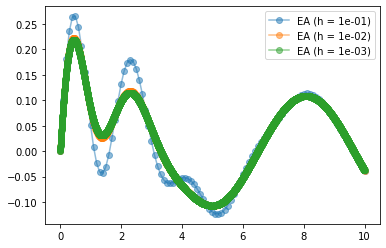

In [6]:
for h in [1e-1, 1e-2, 1e-3]:
  t_h, u_h = eulero_avanti(f, t0, t_max, [x0, v0], h)
  plt.plot(t_h, u_h[:, 0], 'o-', alpha = 0.5, label = 'EA (h = %.0e)' % h)

tt = np.linspace(t0,t_max,100)
plt.legend()

plt.show()

Possiamo notare che per il passo più grande la soluzione è molto inaccurata,
mentre è sostanzialmente uguale per h = 0.01 e h = 0.001. Inoltre si nota
che, dopo un transitorio iniziale, la soluzione si ”sincronizza” con la forzante
sinusoidale.

**(2 punti) [P]** Risolvere lo stesso problema utilizzando il metodo RK45 disponibile in scipy.integrate. Rappresentare la soluzione ottenuta evidenziando l’ampiezza dei passi temporali utilizzati, e commentare il risultato.

numero step % 159


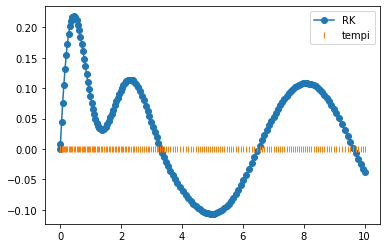

In [20]:
from scipy.integrate import RK45
integratore45 = RK45(f, t0, [x0, v0], t_max, rtol=1.0e-8, atol=1.0e-8)

tRK45 = [t0]
yRK45 = [[x0, v0]]

while integratore45.t < t_max:
  integratore45.step()
  tRK45.append(integratore45.t)
  yRK45.append(integratore45.y)

tRK45 = np.array(tRK45)
yRK45 = np.stack(yRK45)

plt.plot(tRK45, yRK45[:, 0], 'o-',label = 'RK')
plt.plot(tRK45, 0*yRK45[:, 0], '|',label = 'tempi')
plt.legend()
print("numero step %", len(tRK45))


Notiamo nel grafico che la spaziatura dei punti non è uniforme, il passo temporale è più piccolo in corrispondenza dell’inizio della simulazione e nei punti in cui si inverte il segno della velocità. Inoltre, notiamo che con soli 159 passi si ottiene una soluzione comparabile con quella ottenuta con 1000 step di Eulero
Esplicito.

# **Esercizio 2 (10 punti)**

Si consideri il seguente integrale

$$I=\displaystyle\int_0^{\frac{3}{2}} f(x) dx$$

con $f(x)=\sec(x)$. La primitiva dell'integranda \`e $F(x) = \ln |\tan(x) + \sec(x)|$.

**(a) (4 punti)** [T] Introdurre il metodo di quadratura del punto medio e di Simpson e
la loro versione composita. Qualè l’ordine di accuratezza per tali metodi? E il loro
grado di esattezza?

**Soluzione.** * Per la formula del punto medio l'integrale viene approssimato da
        \begin{gather*}
            I \approx I_{pm} = (b-a) f\left(m\right)
        \end{gather*}
        dove $m$ denota il punto medio dell'intervallo di integrazione $[a, b]$, dato da
        $m = 0.5(a+b)$,
        l'errore
        per la formula del punto medio \`e dato da
        \begin{gather*}
            |E_{pm}|\leq \frac{(b-a)^3}{24}  \max_{x \in I} |f^{\prime\prime}(x)|.
        \end{gather*}
        La formula di Simpson, in cui approssimiamo $I$ utilizzando il valore della funzione in tre punti, \`e
        data da
        \begin{gather*}
            I \approx I_s = \frac{b-a}{6} \left[ f(a) + 4 f\left( m \right) +
                f(b) \right],
        \end{gather*}
        dove $m = 0.5 (a+b)$, il cui errore \`e dato da
        \begin{gather*}
            |E_s|\leq \frac{(b-a)^5}{16\cdot 180} \max_{x\in[a,b]} |f^{(iv)} (x)|.
        \end{gather*}
        Nell'integrazione composita suddividiamo l'intervallo $[a,b]$ in $n$ sotto-intervalli, dove, per
        $i=1,\ldots,n$, ogni intervallo \`e dato da $I_i = [x_{i-1}, x_i]$ con $x_i
            = a+ iH$ e dove $H=(b-a)/n$. Otteniamo cos\`i la formula del punto medio composito in cui il valore
        dell'integrale \`e calcolato come
        \begin{gather*}
            I_{pm}^c = H \sum_{i=1}^n f\left(\frac{x_{i-1} + x_i}{2}\right).
        \end{gather*}
        e la formula di Simpson composita risulta data da
        \begin{gather*}
            I_s^c = \frac{H}{6} \sum_{i=1}^n \left[ f(x_{i-1}) + 4 f\left( \frac{x_{i-1}
                    + x_i}{2}\right) + f(x_i)\right].
        \end{gather*}
        L'errore del punto medio
        composito \`e dato da $|E_{pm}^c| \leq c H^2$ e per Simpson abbiamo
        $|E_s^c| \leq c H^4$. L'ordine di accuratezza per il punto medio \`e pari a
        2 mentre per Simpson pari a 4, mentre il grado di esattezza \`e pari a 1 e 3
        rispettivamente.

**(b) (4 punti) [P]** Usando le funzioni pmedcomp e simpcomp (fornite in functions.py) calcolare un’approssimazione di $I$ per le seguenti suddivisioni dell’intervallo di integrazione $N = [10, 20, 40, 80]$.
Calcolare l’errore ottenuto e rappresentarlo in scala logaritmica. Commentare i
risultati ottenuti alla luce della teoria. (Nota: usare la definizione di secante come $\frac{1}{\cos(x)}$ ).

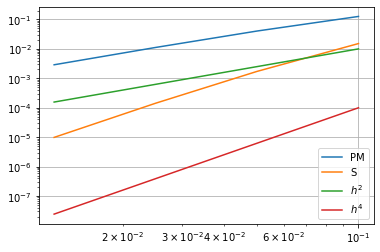

In [3]:
from functions import pmedcomp
from functions import simpcomp
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: 1./np.cos(x)
F = lambda x: np.log(np.abs(np.tan(x)+1./np.cos(x)))
a = 0
b = 3/2
I_ex = F(b)-F(a)

N = np.array([10, 20, 40, 80])

errPM = []
errS = []

for n in N:
    Ipm = pmedcomp(f,a,b,n)
    Is = simpcomp(f,a,b,n)
    errPM.append(np.abs(Ipm-I_ex))
    errS.append(np.abs(Is-I_ex))

plt.figure()
plt.loglog(1./N, errPM, label="PM")
plt.loglog(1./N, errS, label="S")
plt.loglog(1./N, 1./(N*N), label="$h^2$")
plt.loglog(1./N, 1./(N**4), label="$h^4$")
plt.grid()
plt.legend()

Possiamo osservare che, come previsto dalla teoria, l’errore decresce quadraticamente con il metodo del punto medio, e con ordine 4 nel caso del metodo di Simpson.

**(2 punti) [T+P]** Rappresentare graficamente l’integranda $f(x)$, proporre una strategia
per di scomposizione dell’intervallo di integrazione in modo da aumentare l’accuratezza
mantenendo lo stesso numero di divisioni.

Text(0.5, 1.0, 'Integranda')

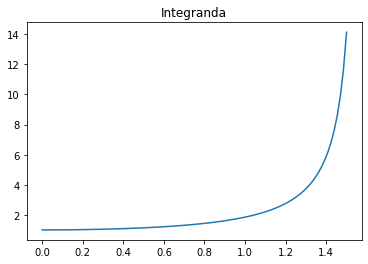

In [28]:
xplot = np.linspace(a,b,100)
plt.plot(xplot, f(xplot))
plt.title("Integranda")

Notiamo che in prossimità dell’estremo $b$ la funzione ha una derivata molto più alta. Una possibile strategia potrebbe essere quella di applicare l’integrazione composita con una risoluzione diversa nella parte destra del dominio, oppure addirittura di adattare l’ampiezza degli intervalli di integrazione in modo continuo per riflettere l’andamento della soluzione. Implementiamo la prima, più semplice, soluzione.

In [33]:
Ipm1 = pmedcomp(f,a,1.25, 40)
Ipm2 = pmedcomp(f,1.25,b, 40)
err_adattivo = np.abs(Ipm1+Ipm2-I_ex)
print("Errore con 80 intervalli uguali", errPM[3])
print("Errore con 80 intervalli (adattivo)", err_adattivo)

Errore con 80 intervalli uguali 0.002885520158149024
Errore con 80 intervalli (adattivo) 0.0006961976710933016


# **Esercizio 3 (10 punti)**

Assumendo $c > 0$, si consideri la seguente equazione di conservazione

$$\begin{cases}
\partial_t c + \partial_x(0.5 c^2) = 0\qquad x\in(0,5),\;t\in(0,T]\\
c(0,x) = e^{-(x-2)^2}\qquad x\in(0,5)\\
c(t,0) = 0\qquad t\in(0,T]
\end{cases}$$

dove il tempo finale è pari a $T = 1$.

**(a) (3 punti) [T]** Verificare se il flusso numerico Upwind è applicabile per la discretizzazione dell’equazione proposta con il metodo dei volumi finiti. Scegliere il valore $h = 0.125$ costante per l’ampiezza delle celle. Calcolare quindi il massimo $\Delta t$ ammesso e chiamare $\Delta t_{max}$ tale valore.

**Soluzione.** Nel caso in esame abbiamo $f (c) = \frac{1}{2}c^2$ e $f^\prime(c) = c$. In base
ai dati iniziali forniti il valore minimo e massimo di $c$ sono rispettivamente
$c_m = c(5) = 1.2341e − 04$, $c_M = 1$ e, per tali valori, la derivata prima della
funzione flusso è sempre non negativa qiundi il flusso upwind è applicabile.
Il massimo della derivata $f^\prime (c)$ si ottiene in corrispondenza di $c = 1$ e vale
$\max_{c\in(c_m ,c_M )} |f^\prime (c)| = 1$. Per soddisfare la condizione CFL dobbiamo quindi
garantire che $\Delta t \max_{c\in(c_m ,c_M )} |f^\prime (c)| < h$. Con i valori scelti si ottiene $\Delta t_{max} = 0.125$.

**(b) (3 punti) [P]** Sia $N = T /\Delta t_{max}$, risolvere il problema utilizzando la function  𝚏𝚟𝚜𝚘𝚕𝚟𝚎
  contenuta nel file  𝚏𝚞𝚗𝚣𝚒𝚘𝚗𝚒.𝚙𝚢 e selezionando il metodo di Upwind per N , N − 2 e 2N passi temporali
(attenzione: calcolare i ∆t corrispondenti!) e rappresentare le soluzioni ottenute
usando la function 𝚡𝚝𝚙𝚕𝚘𝚝 contenuta nel file  𝚞𝚝𝚒𝚕𝚒𝚜_𝚙𝚕𝚘𝚝_𝚌𝚕.𝚙𝚢. Commentare cosa si osserva.

*Soluzione.* Il numero di intervalli $N$ si ottiene come $N = 1/0.125 = 8$. Definiamo i dati necessari per la soluzione numerica e impostiamo il ciclo per calcolare la soluzione con il numero di intervalli richiesto:

0.125


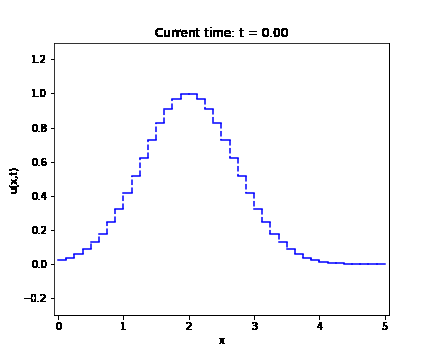

<Figure size 432x288 with 0 Axes>

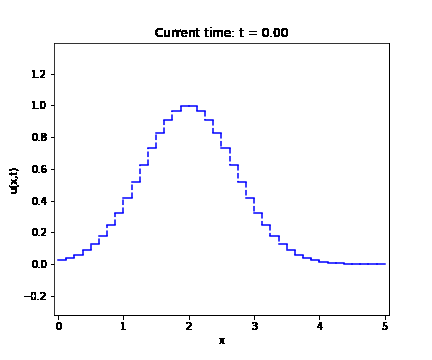

<Figure size 432x288 with 0 Axes>

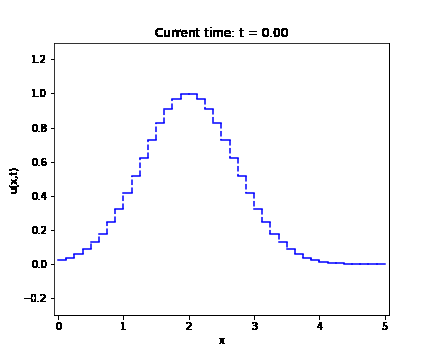

<Figure size 432x288 with 0 Axes>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import functions
from utilis_plot_cl import xtplot

# Dati del problema
u0 = lambda x : np.exp(-(x-2)**2)
f  = lambda c : 0.5*c**2
df = lambda c : c

h = 0.125
dtlim = h/df(1)
print(dtlim)
L = 5
T = 1
N = T/dtlim

# Soluzione per vari valori di N
for n in [N, N-2, N*2]:
    xc, t, u = functions.fvsolve(u0, f, df, L, T, h, T/n, 'UPWIND')
    plt.figure()
    xtplot(xc,t,u)
    plt.show()

Osserviamo che per il passo temporale ”limite” la soluzione è corretta e si osserva la formazione di uno shock; per un passo temporale leggermente superiore al massimo consentito dalla CFL si ha un andamento non fisico che porta a un arresto del solver; per passi temporali minori si ha una soluzione corretta, con una maggiore diffusione numerica.

**(c) (2 punti) [T]** Si descriva il flusso numerico di Godunov e se ne discutano le proprietà.

*Soluzione.* L'idea per introdurre il flusso di Godunov è quella di partire da una soluzione costante a tratti a tempo $t_n$ e di risolvere problemi di Riemann ad ogni interfaccia fra due celle vicine. Per calolare il flusso di Godunov fra le celle $i$ e $i+1$ consideriamo che, a seconda dei valori $c_n^i$ e $c^n_{i+1}$ e della "forma" del flusso, possiamo avere uno shock, una rarefazione o una combinazione dei due; questo determina il valore della soluzione $c^*$ nel nodo $i+\dfrac{1}{2}$ nell'intervallo di tempo $[t_n,t_{n+1}]$. Utilizzando $c^*$ possiamo valutare il flusso numerico all'interfaccia.

Il flusso di Godunov risultante si può esprimere in modo sintetico con la seguente definizione:

$$
F^G_{i+\frac{1}{2}}(c_i,c_{i+1}) =
\begin{cases}
  \min f(\xi), \ \xi\in[c_i,c_{i+1}] &\text{se}\ c_i\leq c_{i+1}, \\
  \max f(\xi), \ \xi\in[c_{i+1},c_i] &\text{se}\ c_i\geq c_{i+1}.
\end{cases}
$$

Osserviamo che se $f$ è monotona questa definizione coincide con il flusso upwind.

**(d) (2 punti) [P]** Si calcoli la soluzione del problema proposto utilizzando ora il flusso
numerico di Godunov e un opportuno passo temporale.

*Soluzione.* Scegliamo ad esempio un passo $\Delta t = 0.9 \Delta t_{\max}$:

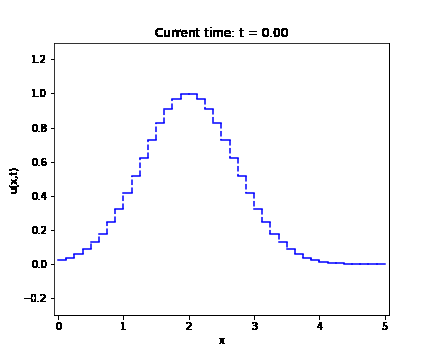

<Figure size 432x288 with 0 Axes>

In [9]:
xc, t, u = functions.fvsolve(u0, f, df, L, T, h, 0.9*T/N, 'GODUNOV')
plt.figure()
xtplot(xc,t,u)
plt.show()